In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
def trapezoidalIntegration(lowerLimit, upperLimit, noOfSegment, integrand):
    h = (upperLimit - lowerLimit)/noOfSegment
    ans = integrand(lowerLimit) + integrand(upperLimit)
    for i in range(1, noOfSegment):
        ans += 2*integrand(lowerLimit + i*h)
    ans = ans*h/2
    return ans

In [90]:
def simpsonIntegration(lowerLimit, upperLimit, noOfApplication, integrand):
    noOfSegment = 2 * noOfApplication
    h = (upperLimit - lowerLimit)/noOfSegment
    ans = integrand(lowerLimit) + integrand(upperLimit)
    for i in range(1, noOfSegment):
        ans += (2 if i%2 == 0 else 4)*integrand(lowerLimit + i*h)
    ans = ans*h/3
    return ans

In [91]:
def fun(x, cme = 5 * (10**-4)):
    f = 6.73*x + 6.725*(10**-8) + 7.26*(10**-4)*cme
    f /= 3.62*(10**-12)*x + 3.908*(10**-8)*x*cme
    f *= -1
    return f

In [92]:
def integrate(lowerLimit, upperLimit, iterations, integrand, integrationFunction):
    prev = None
    for i in range(1, iterations+1):
        cur = integrationFunction(lowerLimit, upperLimit, i, integrand)
        print(f'Iteration: {i}\nAnswer: {cur:0.6f}')
        if prev is not None:
            ea = np.abs((prev - cur)/prev)*100
            print(f'Error: {ea:0.12f}')
        print("\n")
        prev = cur

In [93]:
integrate(1.22*(10**-4), 1.22*(10**-4)*0.5, 5, fun, trapezoidalIntegration)

Iteration: 1
Answer: 17739753.346287


Iteration: 2
Answer: 17738979.292602
Error: 0.004363384707


Iteration: 3
Answer: 17738824.481865
Error: 0.000872715021


Iteration: 4
Answer: 17738769.192316
Error: 0.000311686656


Iteration: 5
Answer: 17738743.390527
Error: 0.000145454226




In [94]:
integrate(1.22*(10**-4), 1.22*(10**-4)*0.5, 5, fun, simpsonIntegration)

Iteration: 1
Answer: 17738721.274707


Iteration: 2
Answer: 17738699.158888
Error: 0.000124675388


Iteration: 3
Answer: 17738697.595143
Error: 0.000008815442


Iteration: 4
Answer: 17738697.311607
Error: 0.000001598405


Iteration: 5
Answer: 17738697.231725
Error: 0.000000450325




In [95]:
def plot():
    initialConcentration = 1.22 * (10**-4)
    x = np.array([1.22, 1.20, 1.0, 0.8, 0.6, 0.4, 0.2])
    x = x * (10**-4)
    y = simpsonIntegration(initialConcentration, x, 5, fun)
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 18,
        }
    plt.figure(figsize=(12, 7))
    plt.plot(x, y, marker='o')
    plt.title("Time vs Oxygen Concentration Graph", fontdict=font)
    plt.xlabel("Oxygen Concentration, x(moles/cc)", fontdict=font)
    plt.ylabel("Time, t(s)", fontdict=font)
    plt.grid()
    plt.show()

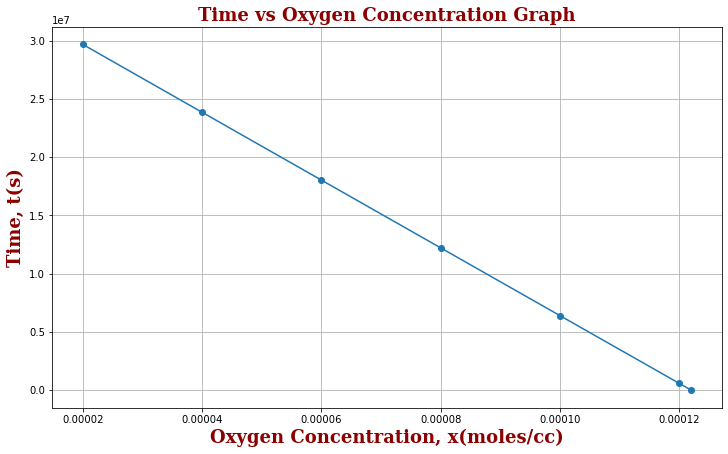

In [96]:
plot()